In [47]:
import tensorflow as tf
from tensorflow import keras  
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [48]:
(X_train,y_train), (X_test,y_test)= keras.datasets.mnist.load_data()

In [49]:
X_train = X_train / 255
X_test = X_test / 255

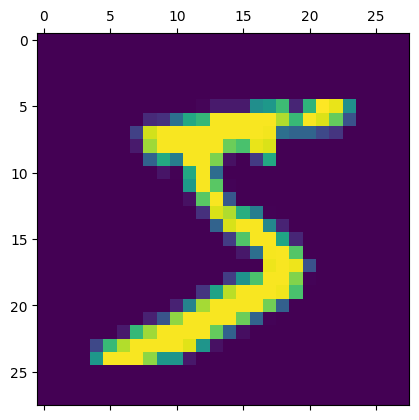

In [50]:
plt.matshow(X_train[0])

In [51]:
x_train_flattened=X_train.reshape(len(X_train),28*28)
x_test_flattened=X_test.reshape(len(X_test),28*28)

In [52]:
x_test_flattened.shape

(10000, 784)

In [53]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4678 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9259


In [54]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2698 - accuracy: 0.9245


[0.2698139250278473, 0.9244999885559082]

In [55]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.75857057e-02, 4.18290995e-07, 4.68765423e-02, 9.60984468e-01,
       2.59383139e-03, 1.20642975e-01, 1.76346339e-06, 9.99755204e-01,
       7.27532580e-02, 6.64523304e-01], dtype=float32)

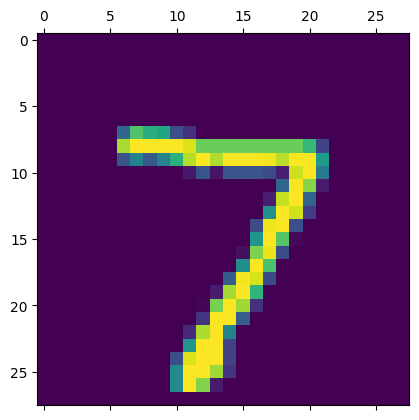

In [56]:
plt.matshow(X_test[0])

In [57]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [58]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    2,    0,    5,   11,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   8,    8,  918,   16,    8,    5,   13,   11,   40,    5],
       [   1,    0,   18,  923,    0,   31,    2,   11,   15,    9],
       [   1,    1,    2,    1,  914,    0,   13,    6,    6,   38],
       [   8,    2,    2,   20,   10,  798,   20,    5,   20,    7],
       [  10,    3,    5,    2,    7,    8,  920,    2,    1,    0],
       [   2,    6,   21,    7,    7,    0,    0,  951,    1,   33],
       [   8,    9,    6,   33,    9,   45,   10,   13,  829,   12],
       [  11,    7,    1,    9,   26,    9,    0,   26,    3,  917]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

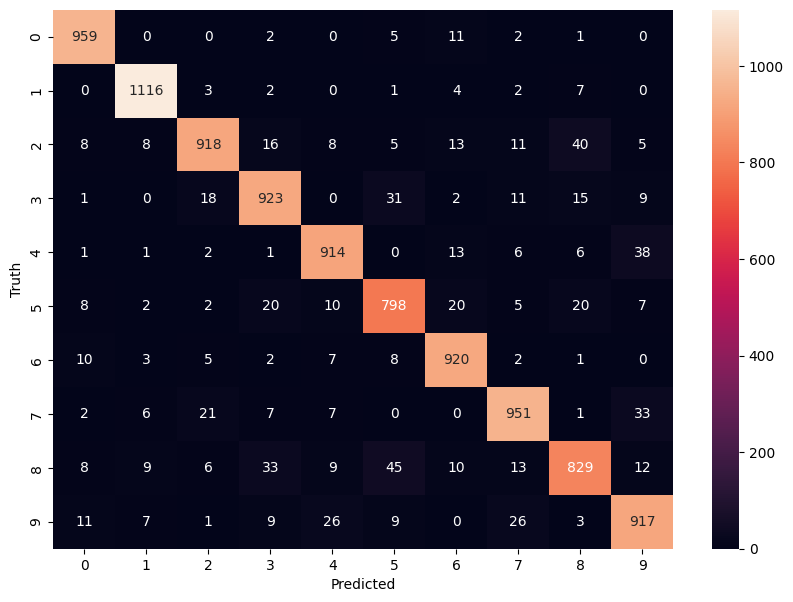

In [59]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Making use of hidden layer**

In [60]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2657 - accuracy: 0.9255
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1202 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0837 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0632 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0486 - accuracy: 0.9852


In [61]:

model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9752


[0.07758035510778427, 0.9751999974250793]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

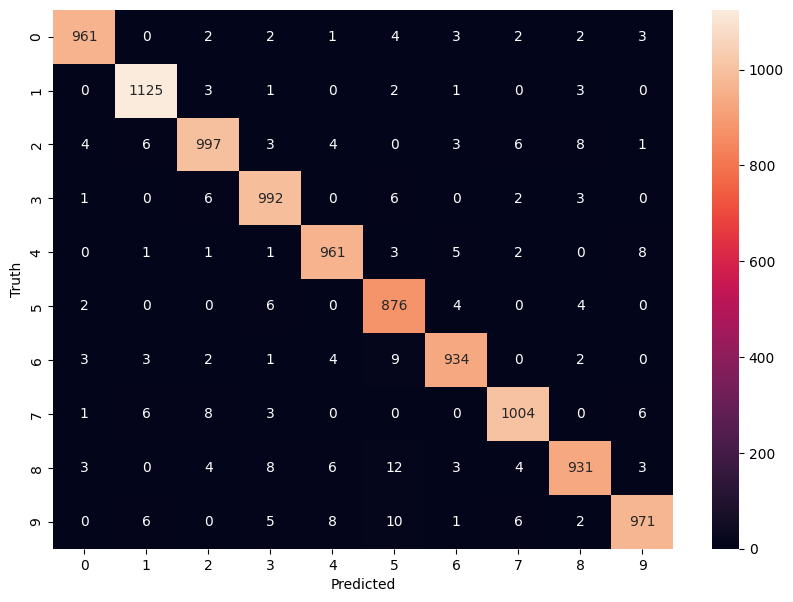

In [62]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2718 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1239 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0866 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0665 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0291 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [64]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9763


[0.09242699295282364, 0.9763000011444092]